In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit

In [5]:
df=pd.read_csv('train.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
date=df.pop('date')

In [6]:
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)

In [7]:
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [8]:
tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(x):
    x_train,x_test=x.iloc[train,:],x.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

In [18]:
catboost_model.fit(x_train, y_train)

In [19]:
y_pred = catboost_model.predict(x_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [21]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.23857326367862705
R-squared: 0.9556413850186
Mean Absolute Error: 0.3778479986520532


In [22]:
model_score = catboost_model.score(x_test, y_test)
print(f"Model Score (R²): {model_score}")


Model Score (R²): 0.9556413850186


        Actual  Predicted
78499    28.61  28.038870
78500    27.98  27.873805
78501    29.48  29.181218
78502    27.52  27.500915
78503    29.66  29.229096
...        ...        ...
104404   22.84  22.592037
104405   29.69  28.914984
104406   22.88  23.618630
104407   28.50  28.401850
104408   27.31  27.466926

[24142 rows x 2 columns]
Predicted Surface Temperature: 29.36783616014384


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


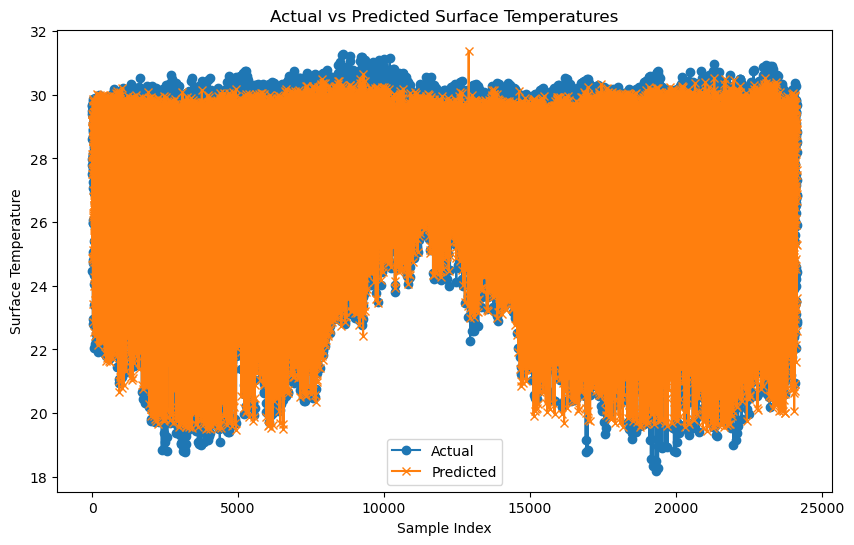

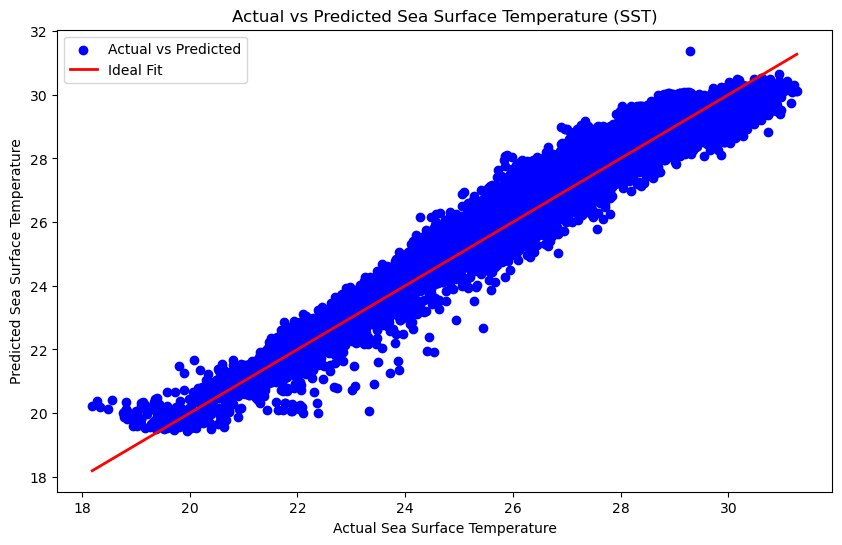

In [28]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

# Predicting surface temperature for sample data
sample_data = [[-4.99, 156, 4.8, -2.8, 78.5, 28.98]]  
scaled_sample_data = scaler.transform(sample_data)
predicted_temp = catboost_model.predict(scaled_sample_data)
print(f"Predicted Surface Temperature: {predicted_temp[0]}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Surface Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Surface Temperature')
plt.legend()
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sea Surface Temperature')
plt.ylabel('Predicted Sea Surface Temperature')
plt.title('Actual vs Predicted Sea Surface Temperature (SST)')
plt.legend()
plt.show()

# Loading our Prediction Files

In [202]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

### Evaulation set

In [205]:
df=pd.read_csv('evaluation.csv')

In [207]:
df2=df.sort_values(['year','month','day'],ascending=[True,True,True])
df2.head()

,Unnamed: 0,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
4951,4951,1980,3,7,-0.02,-109.44,-6.8,0.7,NaN,26.14
16738,16738,1980,3,11,-0.02,-109.44,-4.2,1.5,NaN,25.30
10752,10752,1980,8,27,0.00,-109.56,-3.8,3.7,NaN,22.36
5289,5289,1980,8,29,0.00,-109.56,-5.0,2.4,NaN,22.45
2392,2392,1980,8,31,0.00,-109.56,-6.2,5.1,NaN,23.12


In [209]:
data_imputed=df2.copy()
data_imputed.head()

,Unnamed: 0,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
4951,4951,1980,3,7,-0.02,-109.44,-6.8,0.7,NaN,26.14
16738,16738,1980,3,11,-0.02,-109.44,-4.2,1.5,NaN,25.30
10752,10752,1980,8,27,0.00,-109.56,-3.8,3.7,NaN,22.36
5289,5289,1980,8,29,0.00,-109.56,-5.0,2.4,NaN,22.45
2392,2392,1980,8,31,0.00,-109.56,-6.2,5.1,NaN,23.12


In [211]:
data_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
data_imputed.head()

,Unnamed: 0,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,4951.0,1980.0,3.0,7.0,-0.02,-109.44,-6.8,0.7,82.04,26.14
1,16738.0,1980.0,3.0,11.0,-0.02,-109.44,-4.2,1.5,80.22,25.30
2,10752.0,1980.0,8.0,27.0,0.00,-109.56,-3.8,3.7,80.20,22.36
3,5289.0,1980.0,8.0,29.0,0.00,-109.56,-5.0,2.4,88.54,22.45
4,2392.0,1980.0,8.0,31.0,0.00,-109.56,-6.2,5.1,85.32,23.12


In [212]:
x = data_imputed[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]
x_eva_scaled=scaler.transform(x)

In [213]:
pred = catboost_model.predict(x_eva_scaled)

In [214]:
pred=pd.DataFrame(pred,columns=['s.s.temp.'])
df_pred=pd.concat([data_imputed,pred],axis=1)
df_pred.to_csv('eval_pred.csv')

### 1997_1998 Set

In [216]:
df=pd.read_csv('data_1997_1998 (1).csv')

In [217]:
df2=df.sort_values(['year','month','day'],ascending=[True,True,True])
df2.head()

,Index,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,0,1997,1,1,0.07,-110.0,-3.1,1.4,89.6,22.66
488,488,1997,1,1,-0.22,-124.3,-4.4,1.7,NaN,NaN
1008,1008,1997,1,1,0.01,-140.0,-7.4,-0.6,80.4,24.47
1533,1533,1997,1,1,0.04,147.0,NaN,NaN,84.8,27.34
2062,2062,1997,1,1,-0.01,-155.0,-6.8,-1.3,79.7,25.60


In [218]:
data_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
data_imputed.head()

,Index,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,0.0,1997.0,1.0,1.0,0.07,-110.0,-3.10,1.40,89.60,22.660
1,488.0,1997.0,1.0,1.0,-0.22,-124.3,-4.40,1.70,82.82,28.986
2,1008.0,1997.0,1.0,1.0,0.01,-140.0,-7.40,-0.60,80.40,24.470
3,1533.0,1997.0,1.0,1.0,0.04,147.0,3.06,-2.34,84.80,27.340
4,2062.0,1997.0,1.0,1.0,-0.01,-155.0,-6.80,-1.30,79.70,25.600


In [237]:
x = data_imputed[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]
x_97_scaled=scaler.transform(x)

In [239]:
pred = catboost_model.predict(x_97_scaled)

In [241]:
pred=pd.DataFrame(pred,columns=['s.s.temp.'])
df_pred=pd.concat([data_imputed,pred],axis=1)
df_pred.to_csv('1997_1998_pred.csv')